**<h1> Week 7**
   
We'll be covering the following topics in this week:

1) Dimensionality Reduction:
* PCA
* LDA
* Kernel PCA

2) Model Selection
* K fold cross validation
* Grid Search CV
* Stacking

**<h2> Introduction to Dimensionality Reduction**
    
Dimensionality Reduction means reducing the number of features(columns) in a given dataset.
Imagine working with a dataset with nearly 20000 features. Having so many features makes it problematic to
draw insights from the data. It’s not feasible to analyze each and every variable at a microscopic level. 

**<h2> Why is Dimensionality Reduction important?**
    
* It helps reduce the amount of space required to store the data.
* Less dimensions result into less computation time.
* It helps improve the performance of the ML models by removing redundant features/columns.

**<h2> How is Dimensionality Reduction implemented?**
    
It can be done in two different ways:

* By removing the irrelevant features from the dataset. This is also known as feature selection.
* By finding new input variables which are derived by combining the earlier inputted variables.


In this week, we'll be covering the following Dimensionality Reduction techniques:
* PCA
* Kernel PCA 
* LDA

**<h2>Principal Component Analysis**
    
Principal Analysis combines existing variables to form new variables. These newly extracted variables are addressed as Principal Components.A principal component is a linear combination of the original variables.Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.Third principal component tries to explain the variance which is not explained by the first two principal components and so on.

Check out this link [article](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/) to know more about **PCA** .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
def report_classification(test,pred):
    from sklearn.metrics import classification_report
    return (classification_report(test,pred))
    

In [ ]:
url=('https://raw.githubusercontent.com/kabirnagpal/SoA-ML-14/master/data/Wine.csv')
dataset = pd.read_csv(url)
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The maximum number of columns we can use is equal to total number of columns.  
Let's observe variance along all the columns.

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

Let's try using only two of these columns.  
Hence, we reduced the number of columns to 2.

In [ ]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train[:10]

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344],
       [ 1.09829474,  2.22124345],
       [-2.55584748, -1.66210369],
       [ 1.85698063,  0.24157317],
       [ 2.58288576, -1.3766817 ],
       [ 0.87287612,  2.25618512],
       [-0.41838403,  2.35415681],
       [-0.30497725,  2.27659433],
       [ 2.14082532, -1.10052871]])

From the above data, you can clearly make out the difference between this data and the one we were using before.

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [ ]:
print(report_classification(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



**<h2> Linear Discriminant Analysis**

Linear Discriminant Analysis, like PCA , is a Dimensionality Reduction Technique.It focuses upon maximizing seperatibility among known categories.More formally, given a number of independent features relative to which the data is described,LDA creates a linear combination of those which yield the largest mean difference between the desired classes.


Consider a 2D graph with variables X and Y. Using LDA one can transform this graph into a 1D graph. This is done by creating an axis with an intend to increase separatibility between the variables and plotting it on the 2D graph. Then, the given distribution is projected on this axis, thereby converting it into a 1D graph.

Check out this [tutorial](https://www.youtube.com/watch?v=azXCzI57Yfc) or [article](https://www.geeksforgeeks.org/ml-principal-component-analysispca/) to know more about **LDA** .


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
X_train[:10,:]

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242]])

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

**<h2> Kernel PCA**

PCA is can only applied on data which is linearly separable.It cannot be used on non linear data.Here, Kernel PCA steps in. For a non linear dataset , the Kernel PCA uses a kernel function to project dataset into higher dimension feature space, from where it becomes linearly separable.

Check out this [article](https://www.geeksforgeeks.org/ml-introduction-to-kernel-pca/) to know more.

**<h3> KernelPCA with a linear PCA**

In [ ]:
url=('https://raw.githubusercontent.com/kabirnagpal/SoA-ML-14/master/data/Social_Network_Ads.csv')
dataset = pd.read_csv(url)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Let's observe what will we get if we apply Logistic regression directly?

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[58,  0],
       [22,  0]])

That is a pretty bad performance.Let's try kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'linear')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[50,  8],
       [ 1, 21]])

This was a big improvement. 


**<h3> Non-linear PCA**

The above was an example of a linear kernel PCA. Let's try another example without using the linear kernel.

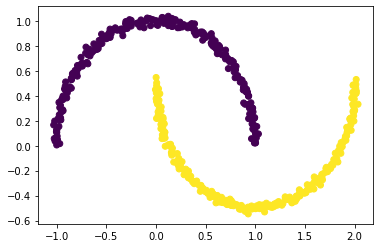

In [ ]:
from sklearn.datasets import make_moons 

X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 

plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show() 


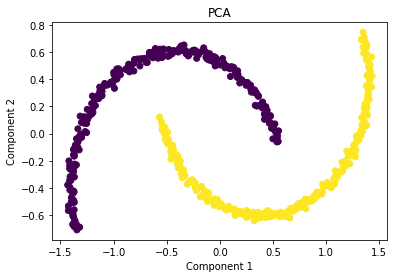

In [ ]:
X_pca = kpca.fit_transform(X) 

plt.title("PCA") 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 

plt.show() 


From the above graph we can see that PCA fails to distinguish between the two classes.

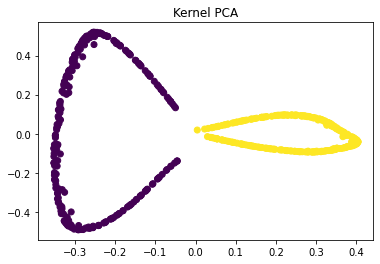

In [ ]:
kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 

plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 


Here, we see that Kernel PCA succesfully distinguish between the two curves.

**<h3>Congratulations on covering the basic concepts of Dimensionality Reduction !**
To know more techniques or to know more about this topic check out this [link](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/).

**<h2> Model Selections**

**<h2> K Fold Cross Validation**

The above implemented ML models are actually not accurate as we did not train on one the whole dataset.  
There is a possibility that we got a high accuracy by chance as the data we splited wasn't distributed evenly.
For this we use K fold cross validation.  

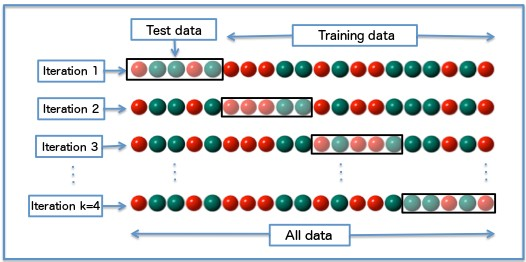


Learn more about it [here](https://scikit-learn.org/stable/modules/cross_validation.html). Check out why we use it [here](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79).

In [ ]:
dataset = pd.read_csv(url)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression()
scores = cross_val_score(classifier,X,y,cv=5)

In [ ]:
scores

array([0.65  , 0.65  , 0.6375, 0.8125, 0.625 ])

The dataset was divided in 5 equal parts and each time one of the part was used as test set and rest as training.  
The final model was trained on whole dataset and the mean of the scores gives us the final accuracy.

In [ ]:
np.mean(scores)

0.675

In [ ]:
kpca = KernelPCA(n_components = 2, kernel = 'linear')
X = kpca.fit_transform(X)
classifier = LogisticRegression()
scores = cross_val_score(classifier,X,y,cv=5)

In [ ]:
np.mean(scores)

0.765

**<h2> Grid Search**

Grid Search is the best way to deal with hyperparameters.It helps in tuning hyperparameters, to give you the best result.In order to do so , you must provide it with the parameters you wish to change.


In [ ]:
dataset = pd.read_csv(url)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier()
grid_values = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
               'p':[1,2]
    }
grid_clf_acc = GridSearchCV(classifier, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[48, 10],
       [ 7, 15]])

In [ ]:
grid_clf_acc.best_params_

{'n_neighbors': 3, 'p': 1}

So we got the best paramters within a single line of code
Once we get the best paramters we can can use cross val score

**<h2>Stacking**
    
* Ensemble Learning:

Ensemble Learning is a technique which combines multiple models to give a better overall performance.This can be achieved in various ways, one of which is Stacking.

* Stacking:

It is an advance ensemble learning technique that uses predictions from multiple models to build a new model.This model is then used for making predictions on a test set. This is popular technique used in data science competitions.

Read more about Ensemble Learning and Stacking [here](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/).

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

estimators = [('knn',KNeighborsClassifier()),('lr',LogisticRegression()),('rf',RandomForestClassifier())]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
y_pred=clf.predict(X_test)
print(report_classification(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



The F1 score dictates a good performance by the model.

**<h2>Congratulations on completing this week's notebook!**